In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

In [3]:
dataset = datasets.load_iris()

In [4]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [6]:
df["target"] = dataset.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

C:\Users\Purva\AppData\Local\Temp\ipykernel_33728\721458596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["target"])


<Axes: xlabel='target', ylabel='Density'>

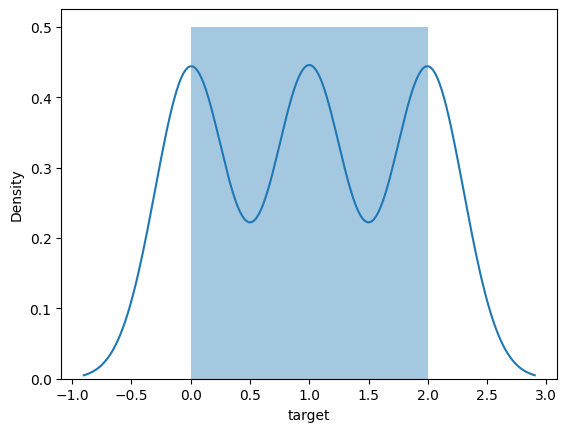

In [11]:
sns.distplot(df["target"])

C:\Users\Purva\AppData\Local\Temp\ipykernel_33728\2993678847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal length (cm)"])


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

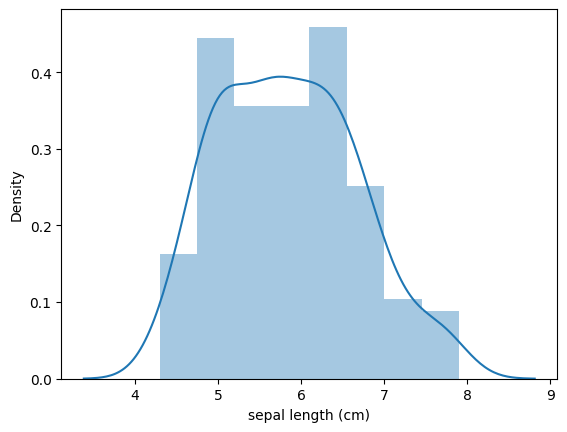

In [12]:
sns.distplot(df["sepal length (cm)"])

C:\Users\Purva\AppData\Local\Temp\ipykernel_33728\1808794975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal width (cm)"])


<Axes: xlabel='sepal width (cm)', ylabel='Density'>

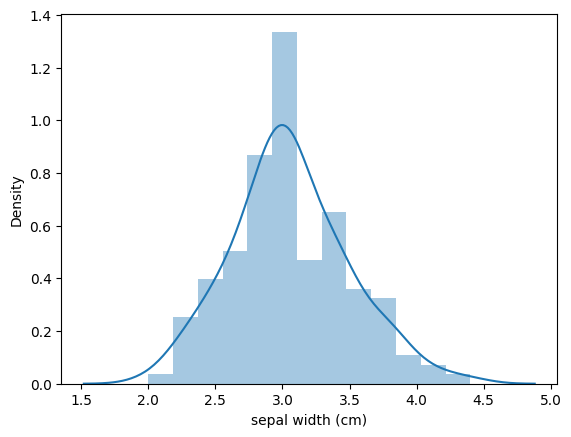

In [13]:
sns.distplot(df["sepal width (cm)"])

C:\Users\Purva\AppData\Local\Temp\ipykernel_33728\887120285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal length (cm)"])


<Axes: xlabel='petal length (cm)', ylabel='Density'>

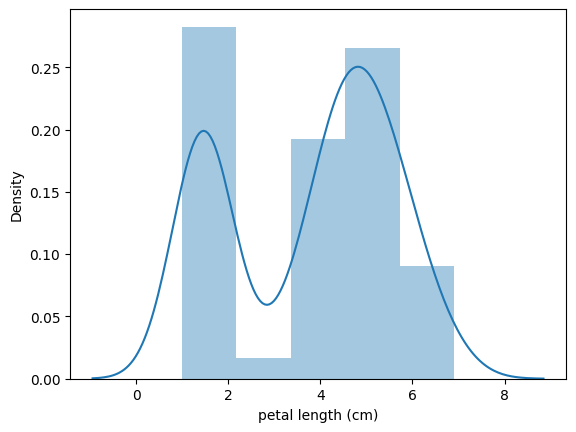

In [14]:
sns.distplot(df["petal length (cm)"])

C:\Users\Purva\AppData\Local\Temp\ipykernel_33728\1921088011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal width (cm)"])


<Axes: xlabel='petal width (cm)', ylabel='Density'>

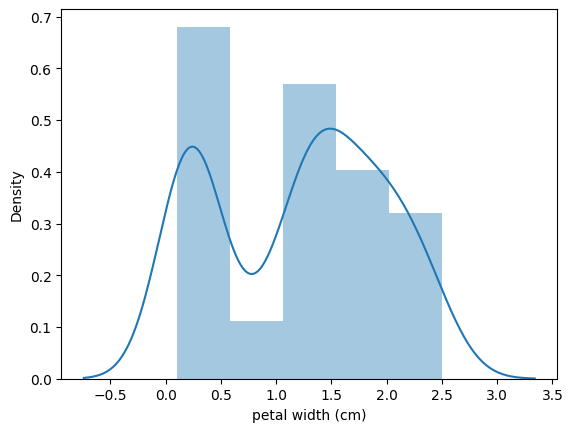

In [15]:
sns.distplot(df["petal width (cm)"])

In [16]:
X,y = dataset["data"],dataset["target"]
pca = PCA(n_components=2)
xt = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

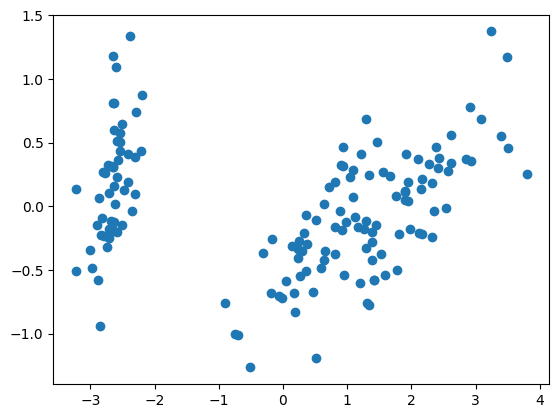

In [18]:
plot = plt.scatter(xt[:,0],xt[:,1])

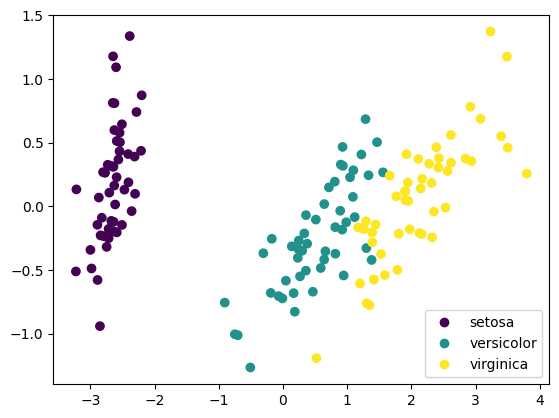

In [19]:
plot = plt.scatter(xt[:,0],xt[:,1],c=y)
plt.legend(handles=plot.legend_elements()[0],labels=list(dataset.target_names))
plt.show()

In [20]:
##Logistic_Regrssion
##KNN
##NB
##DT/RF
##SVM

In [21]:
train_test_split??

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Source:   
@validate_params(
    {
        "test_size": [
            Interval(RealNotInt, 0, 1, closed="neither"),
            Interval(numbers.Integral, 1, None, closed="left"),
            None,
        ],
        "train_size": [
            Interval(RealNotInt, 0, 1, closed="neither"),
            Interval(numbers.Integral, 1, None, closed="left"),
            None,
        ],
        "random_state": ["random_state"],
        "shuffle": ["boolean"],
        "stratify": ["array-like", None],
    },
    prefer_skip_nested_validation=True,
)
def train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
):
    """Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and appli

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [23]:
pd.Series(y_train).value_counts()

0    40
2    40
1    40
Name: count, dtype: int64

In [24]:
X_test.shape

(30, 4)

In [25]:
pd.Series(y_test).value_counts()

0    10
2    10
1    10
Name: count, dtype: int64

In [26]:
model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=10,random_state=12,shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

0.9583333333333333   0.05590169943749475


In [27]:
cv_results

array([1.        , 1.        , 1.        , 0.91666667, 0.91666667,
       0.83333333, 1.        , 0.91666667, 1.        , 1.        ])

In [28]:
model = DecisionTreeClassifier()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

0.95   0.07637626158259733


In [29]:
model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

0.9333333333333333   0.07264831572567788


In [30]:
model = GaussianNB()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

0.9583333333333333   0.05590169943749474


In [31]:
model = SVC()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

0.9666666666666666   0.055277079839256664


In [32]:
model = LogisticRegression(multi_class="ovr")
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kf)
print(cv_results.mean(), " ", cv_results.std())

C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppD

0.95   0.07637626158259733


C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Purva\AppD

In [33]:
model = SVC()
model.fit(X_train,y_train)

ypred = model.predict(X_test)
clasification_report = metrics.classification_report(y_test,ypred)
print(clasification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
## Precision = TP/(TP+FP)
## Recall = TP/(TP+FN)
## F1_score = 2*Precision*Recall/(Precision + Recall)

In [35]:
confusion_matrix = metrics.f1_score(y_test,ypred,average="weighted")
print(confusion_matrix)

0.9665831244778613


HyperParameter Tuning

In [36]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

ypred = model.predict(X_test)
clasification_report = metrics.classification_report(y_test,ypred)
print(clasification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
confusion_matrix = metrics.confusion_matrix(y_test,ypred)
print(confusion_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [38]:
n_neighbors = [5,10,15,20]
metric = ["minkowski","euclidean","manhattan"]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [39]:
parameters = dict(n_neighbors=n_neighbors,metric=metric,weights=weights,algorithm=algorithm)

In [40]:
parameters

{'n_neighbors': [5, 10, 15, 20],
 'metric': ['minkowski', 'euclidean', 'manhattan'],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [41]:
model = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
clf = GridSearchCV(model,param_grid = parameters,scoring="accuracy",cv=kf)
results = clf.fit(dataset.data,dataset.target)

In [42]:
results.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [43]:
KNeighborsClassifier()

KNeighborsClassifier()

In [44]:
results.best_score_

np.float64(0.9733333333333334)

RANDOMFOREST

In [45]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

ypred = ypred = model.predict(dataset.data)
clasification_report = metrics.classification_report(dataset.target,ypred)
print(clasification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [46]:
confusion_matrix = metrics.confusion_matrix(dataset.target,ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


In [47]:
n_estimators = [10,50,100,150,200,250]
criterion = ["gini","entropy"]
max_features = ["auto", "sqrt", "log2"]
class_weight = ["balanced", "balanced_subsample"]

In [48]:
parameters = dict(n_estimators=n_estimators,criterion=criterion,max_features=max_features,class_weight=class_weight)

In [49]:
parameters

{'n_estimators': [10, 50, 100, 150, 200, 250],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'class_weight': ['balanced', 'balanced_subsample']}

In [50]:
model = RandomForestClassifier()
kf = StratifiedKFold(n_splits=10, random_state=12, shuffle=True)
clf = GridSearchCV(model,param_grid = parameters,scoring="accuracy",cv=kf)
results = clf.fit(dataset.data,dataset.target)

C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Purva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

In [51]:
results.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 10}

In [52]:
model = RandomForestClassifier(n_estimators=50,class_weight="balanced")
model.fit(X_train,y_train)

ypred = model.predict(dataset.data)
clasification_report = metrics.classification_report(dataset.target,ypred)
print(clasification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [53]:
confusion_matrix = metrics.confusion_matrix(dataset.target,ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


KNN

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [55]:
X,y = dataset["data"],dataset["target"]

In [56]:
model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier()

In [57]:
ypred = model.predict(X)
confusion_matrix = metrics.confusion_matrix(y,ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [58]:
list(range(1,21,2))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [59]:
model = KNeighborsClassifier()
n_neighbors = range(1,21,2)
weights = ['uniform', 'distance']
metric  = ["minkowski","euclidean","manhattan"]

parameters = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=36851234)
clf = GridSearchCV(estimator = model, param_grid = parameters,scoring="accuracy",cv=cv)
result = clf.fit(dataset.data, dataset.target)

In [60]:
result.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [61]:
tuned_model = KNeighborsClassifier(n_neighbors=15,weights="distance")
tuned_model.fit(X,y)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [62]:
tuned_ypred = tuned_model.predict(X)
confusion_matrix = metrics.confusion_matrix(y,tuned_ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


SVM

In [63]:
model_1 = SVC()
model_1.fit(X,y)

SVC()

In [64]:
ypred = model_1.predict(X)
confusion_matrix = metrics.confusion_matrix(y,ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


In [65]:
C = [0.01,0.1,1,10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [66]:
model_1_1 = SVC()
parameters = dict(C=C,kernel=kernel)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=36851234)
clf = GridSearchCV(estimator = model_1_1, param_grid = parameters,scoring="accuracy",cv=cv)
result = clf.fit(dataset.data, dataset.target)

In [67]:
result.best_params_

{'C': 1, 'kernel': 'linear'}

In [68]:
tuned_model_1_1 = SVC(kernel="linear")
tuned_model_1_1.fit(X,y)

SVC(kernel='linear')

In [69]:
tuned_ypred = tuned_model.predict(X)
confusion_matrix = metrics.confusion_matrix(y,tuned_ypred)
print(confusion_matrix)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [70]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

How to save Machine learning model

In [71]:
import pickle
import numpy as np

In [72]:
filename =  "SVM_classification.sav"
pickle.dump(tuned_model_1_1,open(filename,"wb"))

In [73]:
saved_model = pickle.load(open(filename,"rb"))

In [74]:
xin = np.array([5.1, 3.5, 1.4, 0.2])
xin1 = np.array([7.2, 3. , 5.8, 1.6])

In [75]:
xin = xin1.reshape(1,-1)

In [76]:
xin

array([[7.2, 3. , 5.8, 1.6]])

In [77]:
saved_model.predict(xin)


array([2])

In [78]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
label_mapping = {
    "setosa":0,
    "versicolor":1,
    "virginica":2
}